# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Rahmat Hidayat
- **Email:** hrahmat950@gmail.com
- **ID Dicoding:** rahmathidayat9

## Menentukan Pertanyaan Bisnis

1.Bagaimana tren bulanan rata-rata konsentrasi PM2.5 selama periode pengamatan
2.Apa distribusi konsentrasi SO2 dan bagaimana nilai-nilai ekstrimnya?
3.Apakah ada hubungan antara konsentrasi CO dan PM10?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import seaborn as sns

## Data Wrangling

In [ ]:


# Daftar nama file CSV yang akan digabungkan
file_names = ['/content/PRSA_Data_Changping_20130301-20170228.csv', '/content/PRSA_Data_Dingling_20130301-20170228.csv']

# Nama file keluaran
output_file = 'merged_data.csv'

# Gabungkan file CSV
with open(output_file, 'w', newline='') as outfile:
    writer = csv.writer(outfile)

    # Loop melalui setiap file CSV dalam daftar
    for file_name in file_names:
        with open(file_name, 'r') as infile:
            reader = csv.reader(infile)

            # Tulis semua baris dari file CSV ke file keluaran
            for row in reader:
                writer.writerow(row)

print("Penggabungan file CSV selesai.")


Penggabungan file CSV selesai.


### Gathering Data

In [ ]:
df = pd.read_csv('/content/merged_data.csv', sep=';')
print(df.head())

  No  year month day hour PM2.5 PM10 SO2 NO2     CO  O3  TEMP    PRES  DEWP  \
0  1  2013     3   1    0   3.0  6.0  13   7  300.0  85  -2.3  1020.8 -19.7   
1  2  2013     3   1    1   3.0  3.0   6   6  300.0  85  -2.5  1021.3 -19.0   
2  3  2013     3   1    2   3.0  3.0  22  13  400.0  74    -3  1021.3 -19.9   
3  4  2013     3   1    3   3.0  6.0  12   8  300.0  81  -3.6  1021.8 -19.1   
4  5  2013     3   1    4   3.0  3.0  14   8  300.0  81  -3.5  1022.3 -19.4   

  RAIN   wd WSPM    station  
0  0.0    E  0.5  Changping  
1  0.0  ENE  0.7  Changping  
2  0.0  ENE  0.2  Changping  
3  0.0  NNE  1.0  Changping  
4  0.0    N  2.1  Changping  


<ipython-input-3-fbb46004c0e7>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,13,14,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/merged_data.csv', sep=';')


In [ ]:
# print(df.head()) #menampilkan 5 baris teratas pada tabel
print(df.columns) #menampilkan nama kolom pada tabel
# print(df.dtypes) #menampilkan type data
# print("Jumlah data null: ", df.isnull().sum())
# print("Jumlah duplikasi: ", df.duplicated().sum())
# df.info()
# df.describe()

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')


### Assessing Data

In [ ]:
# Verify column names and data types
print(df.columns)
print(df.dtypes)

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')
No         object
year       object
month      object
day        object
hour       object
PM2.5      object
PM10       object
SO2        object
NO2        object
CO         object
O3         object
TEMP       object
PRES       object
DEWP       object
RAIN       object
wd         object
WSPM       object
station    object
dtype: object


In [ ]:
df['No'] = pd.to_numeric(df['No'], errors='coerce')
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['PM2.5'] = pd.to_numeric(df['PM2.5'], errors='coerce')
df['PM10'] = pd.to_numeric(df['PM10'], errors='coerce')
df['SO2'] = pd.to_numeric(df['SO2'], errors='coerce')
df['NO2'] = pd.to_numeric(df['NO2'], errors='coerce')
df['CO'] = pd.to_numeric(df['CO'], errors='coerce')
df['O3'] = pd.to_numeric(df['O3'], errors='coerce')

# Check for missing values
print(df.isnull().sum())


No            1
year          1
month         0
day           0
hour          0
PM2.5      1554
PM10       1239
SO2        1363
NO2        1980
CO         3534
O3         1976
TEMP        106
PRES        100
DEWP        106
RAIN        102
wd          280
WSPM         86
station       0
dtype: int64


### Cleaning Data

In [ ]:
# print(df.isnull().sum())
print(df.duplicated().sum())

0


In [ ]:
# Menghapus duplikasi berdasarkan seluruh kolom
df.drop_duplicates(inplace=True)

# Mengecek kembali jumlah duplikasi yang tersisa
print(df.duplicated().sum())


0


## Exploratory Data Analysis (EDA)

In [ ]:
print(df.describe())

                 No          year         PM2.5          PM10           SO2  \
count  70128.000000  70128.000000  68575.000000  68890.000000  68766.000000   
mean   17532.500000   2014.662560     68.544806     89.204661     15.158036   
std    10122.177085      1.177205     72.341944     81.699134     29.648268   
min        1.000000   2013.000000      2.000000      2.000000      0.285600   
25%     8766.750000   2014.000000     16.000000     30.000000      2.000000   
50%    17532.500000   2015.000000     43.000000     66.000000      6.000000   
75%    26298.250000   2016.000000     97.000000    125.000000     17.000000   
max    35064.000000   2017.000000    882.000000    999.000000    911.064000   

                NO2            CO            O3  
count  68149.000000  66595.000000  68153.000000  
mean      41.728531   1029.510759     72.751869  
std       59.509558   1016.420962     85.516659  
min        2.000000    100.000000      0.214200  
25%       14.000000    400.000000     

##Analisis Terhadap Outliers
Outliers bisa mempengaruhi hasil analisis atau model yang akan dibuat. Untuk mengidentifikasi outliers, kita bisa menggunakan boxplot atau mengukur z-score:

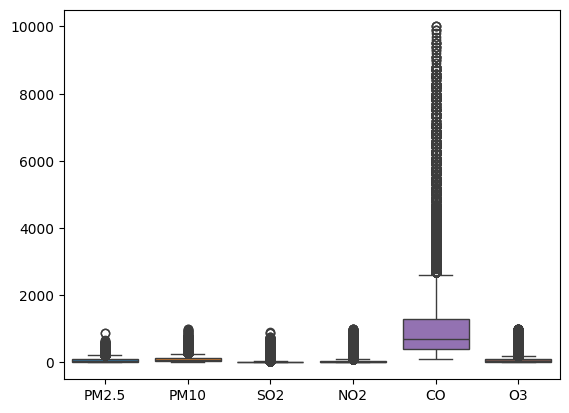

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']])
plt.show()

##Distribusi data
Distribusi data polutan menunjukkan perbedaan yang cukup besar antara kuartil 25% dan kuartil 75%, yang menunjukkan bahwa polusi udara tidak merata dan cenderung fluktuatif di beberapa lokasi atau waktu.

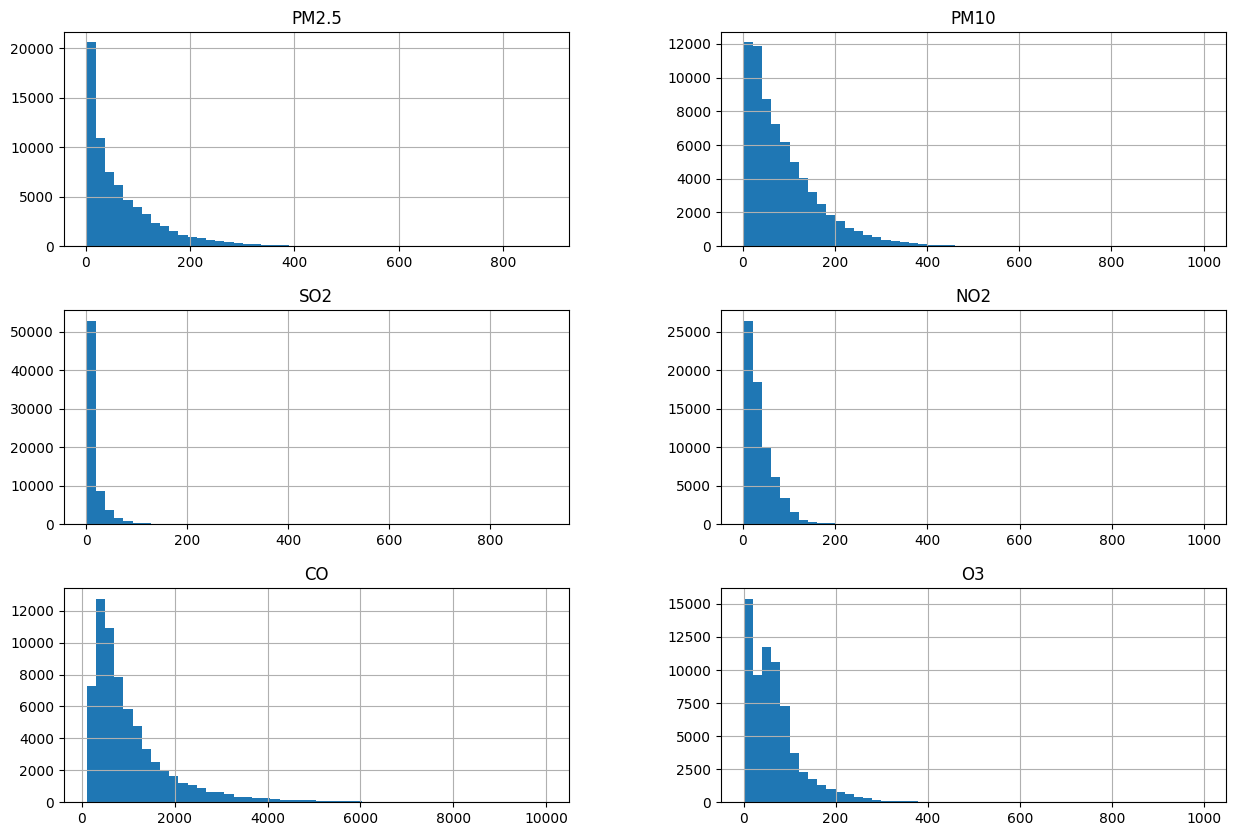

In [ ]:
df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].hist(bins=50, figsize=(15,10))
plt.show()


##Skewness
Skewness (Kecenderungan Distribusi)
Sebagian besar variabel polutan mungkin memiliki distribusi yang skewed (tidak simetris). Kamu bisa memeriksa skewness data untuk setiap variabel. Jika distribusi sangat skewed, kamu bisa mempertimbangkan transformasi data seperti log transformation: **teks tebal**

In [ ]:
skewness = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].skew()
print(skewness)

PM2.5     1.937900
PM10      2.071319
SO2      10.487667
NO2       7.289555
CO        2.804321
O3        4.375409
dtype: float64


##Analisis Waktu (Time Series Analysis)
Karena ini adalah dataset deret waktu, analisis berdasarkan tahun dan bulan bisa memberikan wawasan tambahan. Sebagai contoh, kamu bisa melihat bagaimana polusi udara berubah sepanjang waktu atau berdasarkan musim:

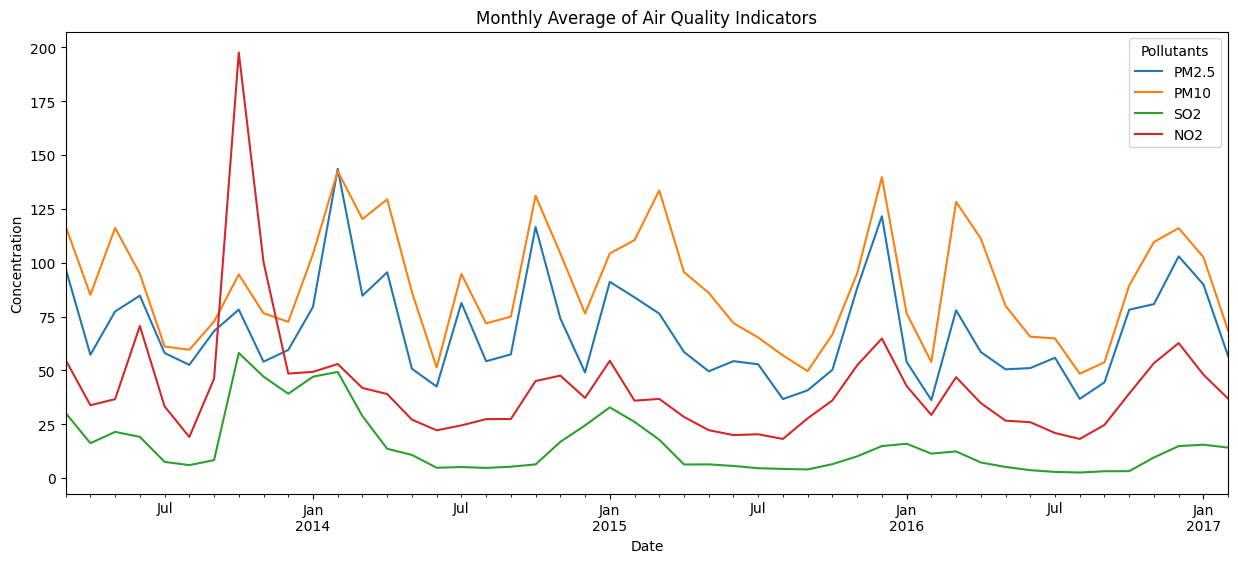

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# Pastikan semua kolom yang diperlukan adalah numerik
df[['year', 'month', 'day', 'hour']] = df[['year', 'month', 'day', 'hour']].apply(pd.to_numeric, errors='coerce')

# Menghapus baris dengan NaN pada kolom yang diperlukan
df.dropna(subset=['year', 'month', 'day', 'hour'], inplace=True)

# Buat kolom datetime
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Set datetime sebagai index
df.set_index('datetime', inplace=True)

# Resample data dan plot
df[['PM2.5', 'PM10', 'SO2', 'NO2']].resample('M').mean().plot(figsize=(15, 6))
plt.title('Monthly Average of Air Quality Indicators')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend(title='Pollutants')
plt.show()


##Korelasi Antar Polutan
Untuk melihat hubungan antara berbagai polutan, kamu bisa melakukan analisis korelasi:

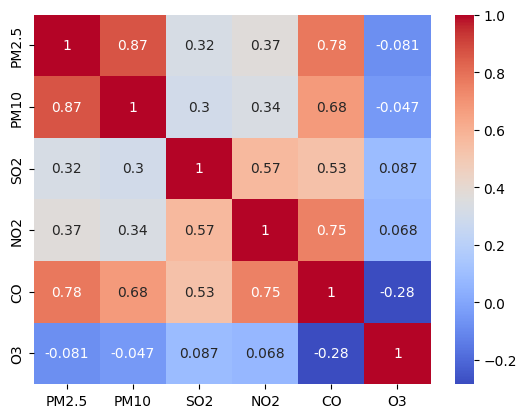

In [ ]:
correlation_matrix = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1:
##Bagaimana tren bulanan rata-rata konsentrasi PM2.5 selama periode pengamatan?

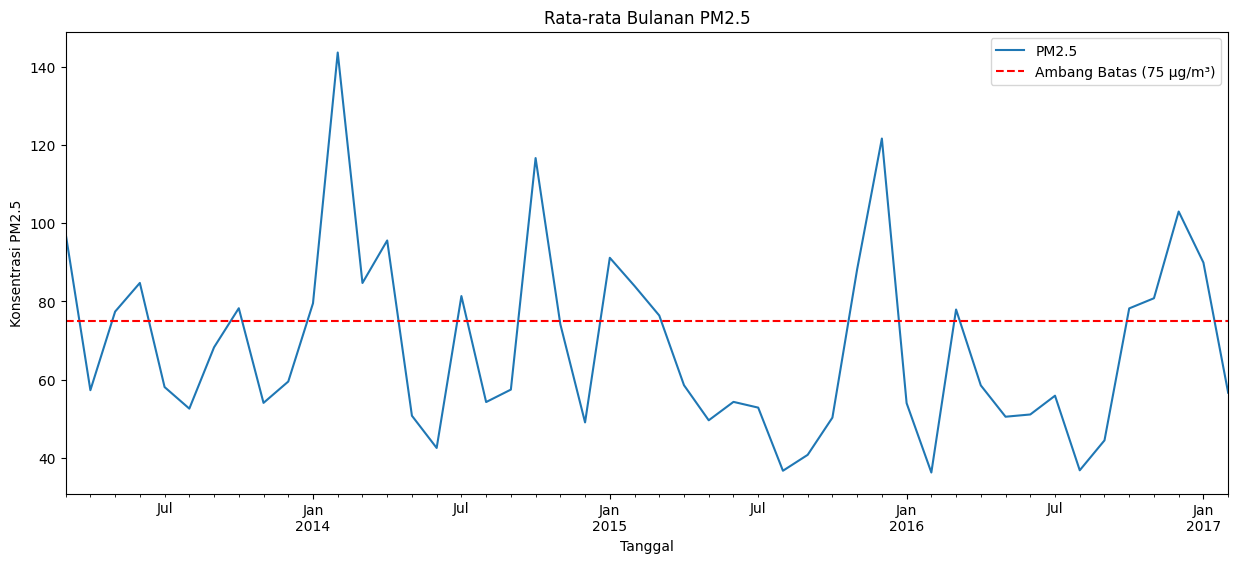

In [ ]:
# Menghitung rata-rata bulanan PM2.5
monthly_pm25 = df['PM2.5'].resample('M').mean()

# Membuat plot
plt.figure(figsize=(15, 6))
monthly_pm25.plot(title='Rata-rata Bulanan PM2.5', xlabel='Tanggal', ylabel='Konsentrasi PM2.5')
plt.axhline(y=75, color='r', linestyle='--', label='Ambang Batas (75 µg/m³)')
plt.legend()
plt.show()

### Pertanyaan 2:
##Pertanyaan: Apa distribusi konsentrasi SO2 dan bagaimana nilai-nilai ekstrimnya?

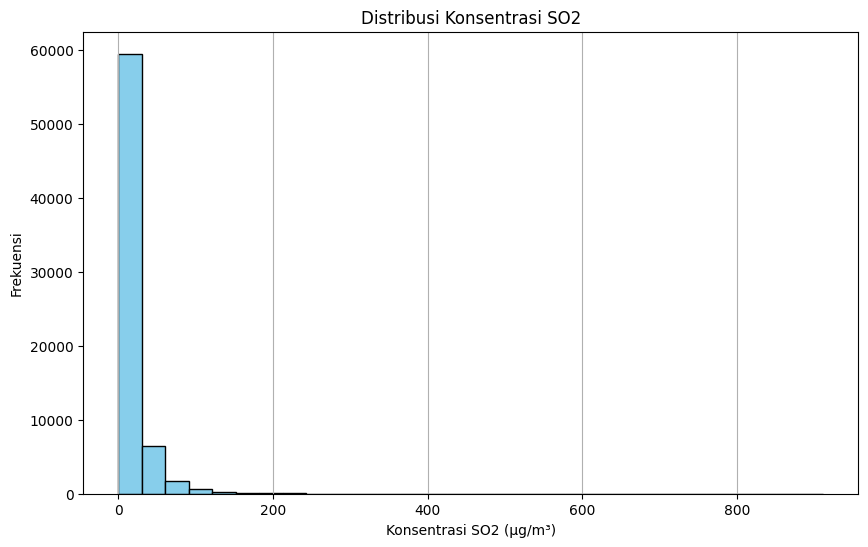

Nilai ekstrim SO2:
                datetime   SO2
0    2013-03-02 23:00:00  68.0
1    2013-03-03 09:00:00  69.0
2    2013-03-03 10:00:00  78.0
3    2013-03-03 11:00:00  91.0
4    2013-03-03 12:00:00  78.0
...                  ...   ...
3339 2017-01-28 16:00:00  63.0
3340 2017-01-28 17:00:00  60.0
3341 2017-02-03 22:00:00  60.0
3342 2017-02-04 11:00:00  59.0
3343 2017-02-04 12:00:00  63.0

[3344 rows x 2 columns]


In [ ]:
# Membuat histogram untuk distribusi SO2
plt.figure(figsize=(10, 6))
df['SO2'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi Konsentrasi SO2')
plt.xlabel('Konsentrasi SO2 (µg/m³)')
plt.ylabel('Frekuensi')
plt.grid(axis='y')
plt.show()

# Menampilkan nilai ekstrim dengan tanggal
extreme_so2 = df[df['SO2'] > df['SO2'].quantile(0.95)].reset_index()
print("Nilai ekstrim SO2:")
print(extreme_so2[['datetime', 'SO2']])


###Pertanyaan3:
##Apakah ada hubungan antara konsentrasi CO dan PM10?

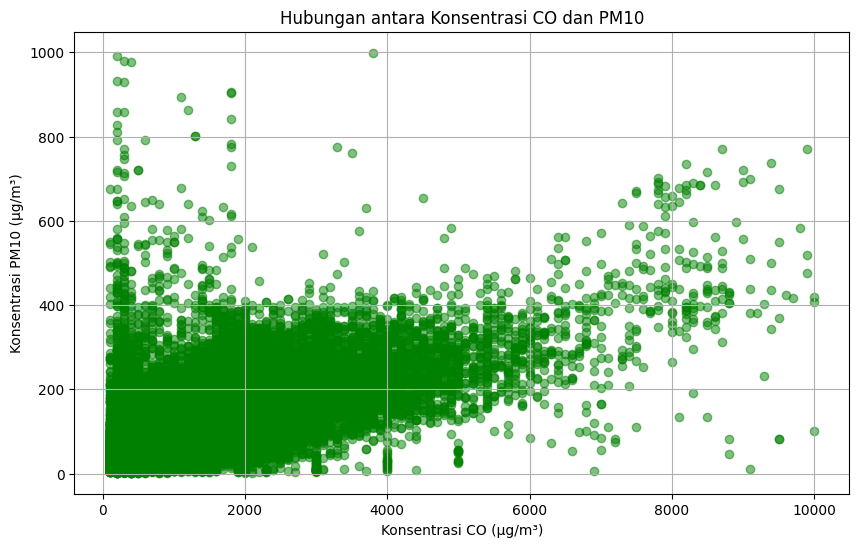

Koefisien Korelasi antara CO dan PM10: 0.6775249050549231


In [ ]:
# Membuat scatter plot untuk melihat hubungan antara CO dan PM10
plt.figure(figsize=(10, 6))
plt.scatter(df['CO'], df['PM10'], alpha=0.5, color='green')
plt.title('Hubungan antara Konsentrasi CO dan PM10')
plt.xlabel('Konsentrasi CO (µg/m³)')
plt.ylabel('Konsentrasi PM10 (µg/m³)')
plt.grid()
plt.show()

# Menghitung koefisien korelasi
correlation = df['CO'].corr(df['PM10'])
print(f"Koefisien Korelasi antara CO dan PM10: {correlation}")

## Analisis Lanjutan (Opsional)

##a. Manual Grouping
Tentukan Kriteria: Tentukan kriteria pengelompokan berdasarkan pemahaman domain, misalnya:

Kelompokkan data berdasarkan level polusi (rendah, sedang, tinggi).
Gunakan batasan tertentu untuk memisahkan kategori.
Buat Kolom Kategori:

In [ ]:
def categorize_pm25(pm25):
    if pm25 < 35:
        return 'Rendah'
    elif pm25 < 75:
        return 'Sedang'
    else:
        return 'Tinggi'

df['PM2.5 Category'] = df['PM2.5'].apply(categorize_pm25)


##b.Binning Data
 Gunakan binning untuk membagi data ke dalam interval.

In [ ]:
bins = [0, 35, 75, 150]
labels = ['Rendah', 'Sedang', 'Tinggi']
df['PM2.5 Binned'] = pd.cut(df['PM2.5'], bins=bins, labels=labels, right=False)


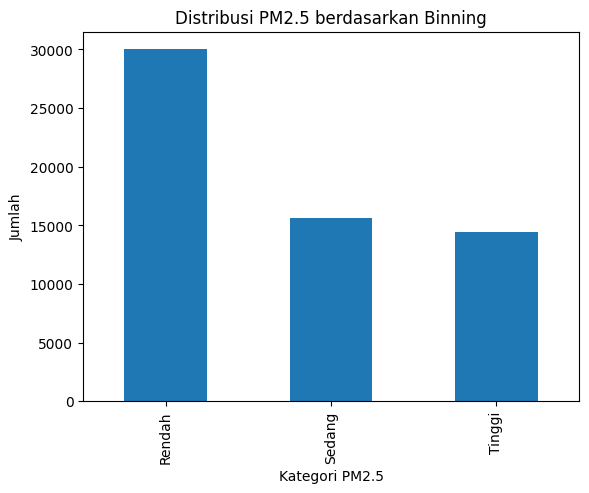

In [ ]:
df['PM2.5 Binned'].value_counts().plot(kind='bar', title='Distribusi PM2.5 berdasarkan Binning')
plt.xlabel('Kategori PM2.5')
plt.ylabel('Jumlah')
plt.show()

## Conclusion

#Kesimpulan
Tren PM2.5: Rata-rata bulanan konsentrasi PM2.5 seringkali melebihi ambang batas 75 µg/m³, terutama pada beberapa puncak tertentu. Hal ini menunjukkan adanya periode tertentu dengan tingkat polusi udara yang cukup tinggi dan berpotensi membahayakan kesehatan masyarakat.

Distribusi SO2: Sebagian besar konsentrasi SO2 terkonsentrasi di nilai rendah (di bawah 50 µg/m³), dengan hanya sedikit data yang mencapai nilai ekstrim di atas 200 µg/m³. Nilai ekstrim yang melebihi kuantil 95% dapat menjadi indikasi adanya insiden polusi udara yang serius pada periode tertentu.

Hubungan CO dan PM10: Terdapat hubungan positif yang cukup kuat antara konsentrasi CO dan PM10 dengan koefisien korelasi sebesar 0,68. Ini menunjukkan bahwa ketika konsentrasi CO meningkat, konsentrasi PM10 juga cenderung meningkat, sehingga kedua polutan ini harus dikelola bersama untuk meningkatkan kualitas udara.

In [ ]:
pip freeze > requirements.txt